<img src = "https://www.bits-pilani.ac.in/Uploads/Campus/BITS_university_logo.gif">

<h1><center>Work Integrated Learning Programmes Division<br>
M.Tech (Data Science and Engineering)<br> Data Visualization And Interpretation (DSECL ZG555))<br>
Second Semester, 2021-22
</center></h1>

<h2><center>Assignment 2 – PS9 [Weightage 13%]</center></h2>

<ol>
  <li>Do not change the name of the data file that is shared with the problem statement.</li>
  <li>If intermediate data files are created, retain in the present working directory and attach them during submission.</li>
  <li>Retain the data file in the same directory as that of this workbook.</li>
  <li>Retain the Visualizations that is produced in the file. Don't clear them away.</li>
  <li>All the visuals should adhere to the visualization principles learnt in the Course and must be presentation ready. Most effective visuals would fetch maximum credits</li>
  <li>Submissions done via means other than CANVAS will strictly be NOT graded.</li>
</ol>

<style>
table {
  font-family: arial, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

td, th {
  border: 1px solid #dddddd;
  text-align: left;
  padding: 8px;
}

tr:nth-child(even) {
  background-color: #dddddd;
}
</style>

<h2>Group No: Group 186</h2>

<table>
  <tr>
    <th>Full Name</th>
    <th>BITS ID</th>
    <th>Contribution</th>  
  </tr>
  <tr>
    <td>Sindhu C</td>
    <td>2021FC04993</td>
    <td>100%</td>      
  </tr>
  <tr>
    <td>Sivarajan N</td>
    <td>2021FC04989</td>
    <td>100%</td>      
  </tr>
  <tr>
    <td>Manibalan S</td>
    <td>2021fc04442</td>
    <td> 0% </td>      
 </tr>
</table>



## Objective
<h4>A top financial consultancy firm have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the ABC Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.</h4>




##  Download and Prep the Data: 1 Marks

<h4>Import the libraries needed</h4>

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns
import missingno as msno

%matplotlib inline

In [84]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

<h4> Load data and store in dataframe </h4>

In [85]:
dataframe = pd.read_csv('dvi-a2-ps9-data.csv')
# read the source as provided in the Problem into a Dataframe

<h4>Find out  what type of variable you are dealing with. This will help you find the right visualization method for that variable.</p>


In [86]:
dataframe.shape
# Analyse the Dataframe

(340, 15)

In [87]:
dataframe.head(5)
# Load first 5 rows for sanity check

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [88]:
#  describe is used to get a descriptive statistics summary of a given dataframe. 
# This includes mean, count, std deviation, percentiles, and min-max values of all the features.
dataframe.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


In [89]:
    dataframe.info()
    # Analyse the Dataframe for null and type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

####  Types of variable we are dealing with in the dataset
- 15 columns including Ticker Symbol and Price related columns
- 4 nominal objects, 11 numeric (7 float64, 4 int64)
- Visualization will be done on those 11 numeric fields
- 340 rows of data


<hr  style="height:3px;">


# Visualisation Questions - 2 X 5 = 10 Marks

### Question 1
<h4>Perform Univariate analysis on <b>Price Change</b>
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

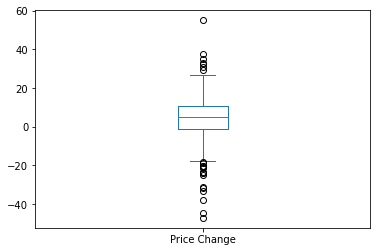

<AxesSubplot:>

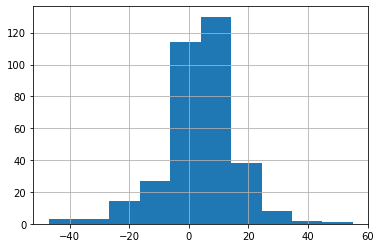

In [90]:
# In univariate analysis we will be using a single feature to analyze its properties.
# As per problem statement, the chosen feature is 'Price Change'
# We will use box and whisker plots
dpPC = dataframe['Price Change']
dpPC.plot(kind='box')
pyplot.show()
dpPC.hist()

##### Answers for Question 1
<h4>1. Findings from the visual </h4>
Price Change is seen as a normal distribution. <br>
In univariate analysis we will be using a single feature to analyze its properties. <br>
As per problem statement, the chosen feature is 'Price Change' <br>

<h4>2. Reason for Selecting box ( whisker)  plots  and Bar charts</h4>
Box plots are an efficient summary of one variable (univariate chart). <br>
Box plot shows the so-called five-number summary of a univariate data series. <br>
Use a box and whisker plot to show the distribution of data within a population. They allow for users to determine where the majority of the points land at a glance. They are even more useful when comparing distributions between members of a category in your data.<br>
We also used the Bar chart to visualize if the data is skewed or normally distributed.<br> 


<h4>3. Preattentive Attributes used</h4>
Which information caught your attention:<br> 
- We look at <b>Spatial Positioning (2-D position)</b> to check for outliers<br>
- <b>Line Length</b> to check the relative size of Price change

<h4>4. Gestalt Principles used</h4>
- Law of Proximity in the Box plot<br>
- Law of Similarity (in same colors chosen)

<hr  style="height:3px;">


### Question 2
<h4>Perform a visual analysis to detect outliers in Current Price and Net Income 
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

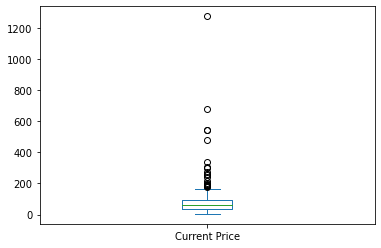

<AxesSubplot:>

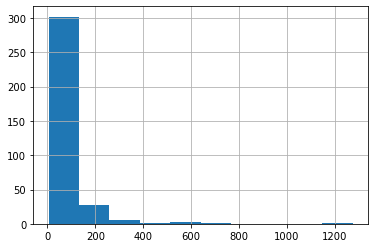

In [91]:
dfCP = dataframe['Current Price'] # copy only Current Price to a new dataframe
dfCP.plot(kind='box', subplots=True)
pyplot.show()
dfCP.hist()

Upper Limit of Current Price is  585.727635810001
Lower Limit of Current Price is  6.1295
0       42.349998
1       59.240002
2       44.910000
3       93.940002
4       55.320000
          ...    
335     33.259998
336     52.516175
337    102.589996
338     27.299999
339     47.919998
Name: Current Price, Length: 336, dtype: float64


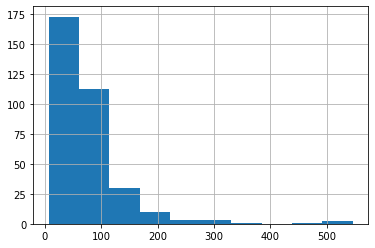

In [92]:
lower_limit, upper_limit = np.percentile(a=dfCP,q=[0.5,99.5]) # chooose0.5 and 99.5 percentile to remove the outliers
print("Upper Limit of Current Price is ", upper_limit)
print("Lower Limit of Current Price is ", lower_limit)
df_scores_filtered = dfCP[(dfCP>lower_limit) & (dfCP<upper_limit)]
df_scores_filtered.describe()
print(df_scores_filtered)
df_scores_filtered.hist() #chart after removal of outliers
pyplot.show()

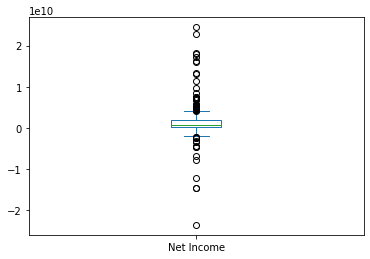

Upper Limit of Net Income is  19567730000.000034
Lower Limit of Net Income is  -14524455000.0
0      7610000000
1      5144000000
2      4423000000
3       629551000
4       696878000
          ...    
335   -4359082000
336    1293000000
337     147000000
338     309471000
339     339000000
Name: Net Income, Length: 338, dtype: int64


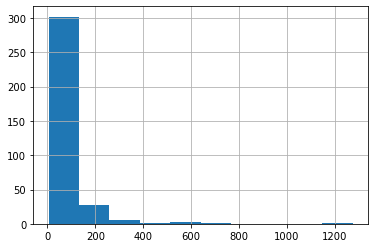

In [93]:
dfNI = dataframe['Net Income'] # copy only Net Income to new dataframe
dfNI.plot(kind='box', subplots=True)
pyplot.show()
dfCP.hist()
lower_limit, upper_limit = np.percentile(a=dfNI,q=[0.5,99.5])
print("Upper Limit of Net Income is ", upper_limit)
print("Lower Limit of Net Income is ", lower_limit)
df_scores_filtered = dfNI[(dfNI>lower_limit) & (dfCP<upper_limit)]
df_scores_filtered.describe()
print(df_scores_filtered)

##### Answers for Question 2

<h4>1. Findings from the visual </h4>
The data distribution for Current Price is skewed <br> 
There are 4 outliers for Current price, 5th and 95th percentile values are 585.727635810001 and 6.1295
The Data Distribution for Net Income is also skewed. <br>
There are 2 outliers in Net Income, 5th and 95th percentile values are 19567730000.000034 and -14524455000.0 <br>

<h4>2. Reasons for selecting the chart types:</h4>
Box chart shows the outliers clearly, and lets us decide if we need to remove the outliers are not. <br>
Box plots are useful as they show outliers within a data set. An outlier is an observation that is numerically distant from the rest of the data. When reviewing a box plot, an outlier is defined as a data point that is located outside the whiskers of the box plot. <br>
Bar chart shows if the data is skewed or normally distributed.  <br>

<h4>3. Preattentive Attributes used</h4>
- We look at <b>Spatial Positioning (2-D position)</b> to check for outliers<br>
- <b>Line Length</b> to check the relative size of Current Price, Net Income. This also helps find if the data is skewed.

<h4>4. Gestalt Principles used</h4>
- Law of Proximity in the Box plot<br>
- Law of Similarity (in same colors chosen)

<hr  style="height:3px;">


### Question 3
<h4>Identify the correlation between all numerical variables.
<br><br>    
Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

In [94]:
dataframe.corr()
# corr lists the correlation (relationship) between each numerical column in the DataFrame

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Current Price,1.000000,0.134982,-0.124257,-0.000549,0.127816,-0.021961,0.036625,0.479604,-0.145306,0.260273,0.124634
Price Change,0.134982,1.000000,-0.408281,-0.043310,0.168586,0.026746,0.179298,0.175401,0.033656,-0.002491,0.034329
Volatility,-0.124257,-0.408281,1.000000,0.162532,0.020605,-0.014172,-0.383433,-0.379309,-0.095704,0.263600,0.046528
ROE,-0.000549,-0.043310,0.162532,1.000000,-0.069122,-0.052205,-0.288524,-0.405291,-0.030288,0.023341,-0.063218
Cash Ratio,0.127816,0.168586,0.020605,-0.069122,1.000000,0.113819,0.028589,0.024759,0.135869,0.089483,0.229672
Net Cash Flow,-0.021961,0.026746,-0.014172,-0.052205,0.113819,1.000000,0.044229,0.019348,-0.051392,0.026876,0.057039
Net Income,0.036625,0.179298,-0.383433,-0.288524,0.028589,0.044229,1.000000,0.557752,0.589310,-0.224022,-0.061544
Earnings Per Share,0.479604,0.175401,-0.379309,-0.405291,0.024759,0.019348,0.557752,1.000000,-0.026906,-0.260660,0.014915
Estimated Shares Outstanding,-0.145306,0.033656,-0.095704,-0.030288,0.135869,-0.051392,0.589310,-0.026906,1.000000,-0.014551,-0.028155
P/E Ratio,0.260273,-0.002491,0.263600,0.023341,0.089483,0.026876,-0.224022,-0.260660,-0.014551,1.000000,0.036422


In [95]:
dataframe.corr().style.background_gradient(cmap="Blues")
# Visualize the same correlation

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Current Price,1.000000,0.134982,-0.124257,-0.000549,0.127816,-0.021961,0.036625,0.479604,-0.145306,0.260273,0.124634
Price Change,0.134982,1.000000,-0.408281,-0.043310,0.168586,0.026746,0.179298,0.175401,0.033656,-0.002491,0.034329
Volatility,-0.124257,-0.408281,1.000000,0.162532,0.020605,-0.014172,-0.383433,-0.379309,-0.095704,0.263600,0.046528
ROE,-0.000549,-0.043310,0.162532,1.000000,-0.069122,-0.052205,-0.288524,-0.405291,-0.030288,0.023341,-0.063218
Cash Ratio,0.127816,0.168586,0.020605,-0.069122,1.000000,0.113819,0.028589,0.024759,0.135869,0.089483,0.229672
Net Cash Flow,-0.021961,0.026746,-0.014172,-0.052205,0.113819,1.000000,0.044229,0.019348,-0.051392,0.026876,0.057039
Net Income,0.036625,0.179298,-0.383433,-0.288524,0.028589,0.044229,1.000000,0.557752,0.589310,-0.224022,-0.061544
Earnings Per Share,0.479604,0.175401,-0.379309,-0.405291,0.024759,0.019348,0.557752,1.000000,-0.026906,-0.260660,0.014915
Estimated Shares Outstanding,-0.145306,0.033656,-0.095704,-0.030288,0.135869,-0.051392,0.589310,-0.026906,1.000000,-0.014551,-0.028155
P/E Ratio,0.260273,-0.002491,0.263600,0.023341,0.089483,0.026876,-0.224022,-0.260660,-0.014551,1.000000,0.036422


##### Answers for Question 3

<h4>1. Findings from the visual: </h4>
The Correlations we found are as below<br>
a) A strong positive correlation between Earnings per share and Current Price, Net Income. <br>
b) A strong positive correlation between Estimated Sharest outstanding and Net Income.<br>
c) A slightly positive correlation between Net Cash Flow and Net Income, Earnings per Share<br>
d) Strong negative correlations between Volatility and Net Income, Price Change, Earnings per Share<br>
e) Almost No correlation between Current Price and ROE,  P/E Ratio and Price Change.<br>

<h4>2. Reason for selecting the chart type - Heatmap </h4>
a)  A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data <br>
b) Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. <br>
c) We can Visualise how well features correlate with each other with a simple heatmap<br>


<h4>3. Preattentive Attributes used</h4>
- We look at <b>Color</b> coding to check the correlation. Hues and intensities are preattentively processed here.<br>
- <b>Enclosure</b> - all of the data is enclosed here within the heatmap chart.

<h4>4. Gestalt Principles used</h4>
- Law of Proximity <br>
- Law of Similarity (in colors chosen with a grade)

<hr  style="height:3px;">

  ### Question 4
<h4>
Show ,how average cash ratio varies across economic sectors.  
<br><br>
create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

<AxesSubplot:xlabel='GICS Sector'>

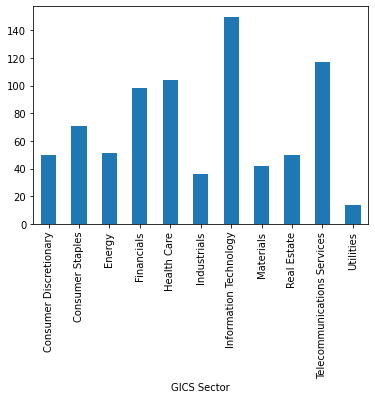

In [96]:
dataframe.groupby('GICS Sector')['Cash Ratio'].mean().plot(kind='bar')

<h4>1. Findings from the visual </h4>
We are plotting the average cash ratio across economic sectors in the above bar chart.<br>
We find that the average varies from ~145 to ~15 <br>
The highest Cash Ratio average is seen in Information Security Sector <br>
The lowest Cash Ration average is seen in Utilities sector.

<h4>2. Reason for selecting the chart type - Bar Charts </h4>
a) Bar charts are one of the many techniques used to present data in a visual form so that the reader may readily recognize patterns or trends. <br>
b) A bar diagram makes it easy> to compare sets of data between different groups at a glance. In our case, we quickly get to know the average of each sector.<br>
c) Bar charts usually present categorical variables, discrete variables<br>
d) Bar chart is used when you want to show a distribution of data points or perform a comparison of metric <br>


<h4>3. Preattentive Attributes used</h4>
Which information caught your attention:<br> 
- We Compare the <b>lengths</b> to find the relative Cash Ratio.<br>
- Each industry is equally important, so we have used the same <b>Color</b>

<h4>4. Gestalt Principles used</h4>
- Law of Similarity in each of the bars<br>
- Law of Common Region, the data is one region within the chart
<hr  style="height:3px;">

  ### Question 5
<h4>
Identify the % distribution of companies as per the GICS eonomic sectors.
<h4>Write the python code in the below cell to create appropriate visual to perform the above task.
<h4> Answer in markdown cells below the visual
<br><br>
<ol>
    <li>Summarise your findings from the visual</li>
    <li>The reason for selecting the chart type you did</li>
    <li>Mention the pre-attentive attributes used.(atleast 2)</li>
    <li>Mention the gestalt principles used.(atleast 2)</li>
</ol>

<AxesSubplot:title={'center':'GICS Sector'}, ylabel='GICS Sector'>

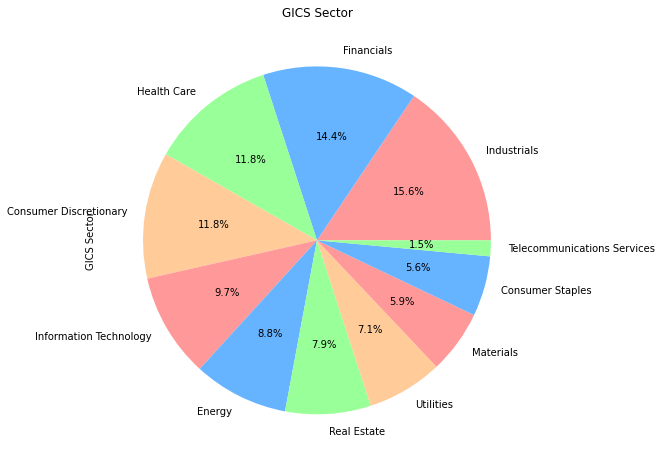

In [97]:
df1 = dataframe['GICS Sector'].value_counts()
#add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
df1.plot.pie(autopct='%1.1f%%',subplots=False,title="GICS Sector", colors = colors,figsize=(8,8) )


<h4>1. Findings from the visual </h4>
We are visualizing the % distribution of companies as per the GICS eonomic sectors <br>
As seen in the chart above, Industrials, Financials, Health care and Consumer Discretionary together make up 50 of the companies. <br>
Telecommunication Services, Consumer Staples, and Materials have the lowest share amont the companies.<br>

<h4>2. Reason for selecting the chart type - Pie chart</h4> 
- We use Pie chart here to visualize the % distribution<br>
- Pie charts are used here to represent sample data—with data points belonging to a combination of different categories. Each of these categories is represented as a “slice of the pie.” The size of each slice is directly proportional to the number of data points that belong to a particular category.<br>
- Pie chart can only be used if the sum of the individual parts add up to a meaningful whole.<br>


<h4>3. Preattentive Attributes used</h4>
Which information caught your attention:<br> 
- <b>Color</b> difference in each pie slice helps differentiate each Industry.<br>
- <b>Enclosure</b> - the sum total of all values in pie comes to 100%


<h4>4. Gestalt Principles used</h4>
- Principle of closure states that when we look at a complex arrangement of visual elements in a pie chart, we tend to look for a single, recognizable pattern.<br>
- Law of Similarity in each pie slice
<hr  style="height:3px;">

# Group's choice-2 Marks
 
#### Frame 1 (more) question which will help in the EDA(Exploratory Data Analysis) of the given data set and answer the same using the best visual.
 
 1. Write the question in a markdown cell
 2. Below the question,in a coding cell,write the python code to create the visual to answer the question  

<h4> Answer in markdown cells below the visual <br><br>
   1.Summarise your findings from the visual.<br>
   2.The reason for selecting the chart type you did <br>
   3.Mention the pre-attentive attributes used.(atleast 2)<br>
   4.Mention the gestalt principles used.(atleast 2)<br>

Exploratory data analysis (EDA) involves using graphics and visualizations to explore and analyze a data set.  \
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, recognize errors and check correlations with the help of summary statistics and graphical representations. \
The given data set in this problem is about Stock price data from a particular exchange, and in the previous questions we have done the initial investigations, discovered patterns, spot/fix anomalies and performed correlations.  \
Lets add another question to check the important factors, feature selection using sns, question shown below.

#### Question that will help in the EDA(Exploratory Data Analysis) of the given data set  
### "What are the most relevant features in this dataset?"

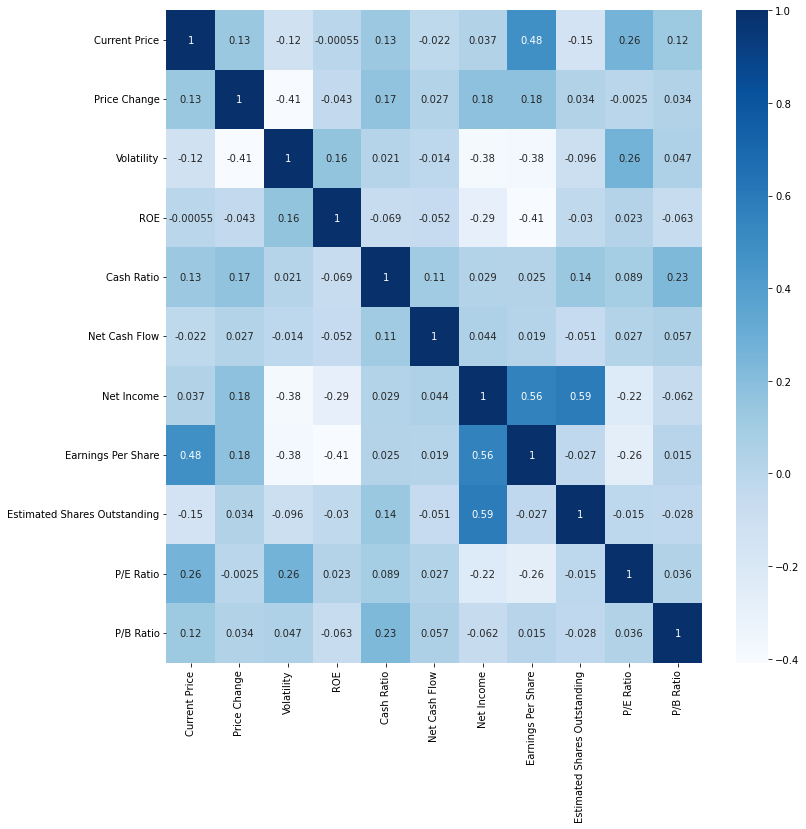

In [98]:
#Using Pearson Correlation
pyplot.figure(figsize=(12,12))
cor = dataframe.corr()
sns.heatmap(cor, annot=True, cmap="Blues")
pyplot.show()

In [99]:
#Correlation with output variable
cor_target = abs(cor["Current Price"])#Selecting highly correlated features to Current Price
relevant_features = cor_target[cor_target>0.1]
relevant_features

Current Price                   1.000000
Price Change                    0.134982
Volatility                      0.124257
Cash Ratio                      0.127816
Earnings Per Share              0.479604
Estimated Shares Outstanding    0.145306
P/E Ratio                       0.260273
P/B Ratio                       0.124634
Name: Current Price, dtype: float64

<h4>1. Findings from the visual</h4>
- The most important feature is Current Price, so we choose that to find its relevant features<br>
- We experimented with Correlation target of 0.5, 0.4, 0.3 and 0.2 - they did not net the relevant features since most of the correlation is slightly positive only.<br>
- We used 0.1 as the Correlation target, With this value we find Current price is relevant to Earnings Per Share, P/E Ration, Price Change, Volatility, Cash Ratio, Estimated Shares Outstanding, P/B ratio.<br><br>

<h4>2. Reason for selecting the chart type</h4>
- We have used Heatmap here to find the correlation<br>
- We used Correlation target and then Relevant features to filter the list of relevant features to Current Price<br>
- A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data<br>
- Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables.<br>
- We can Visualise how well features correlate with each other with a simple heatmap

<h4>3. Preattentive Attributes used</h4>
Which information caught your attention:<br> 
- We look at <b>Color</b> coding to check the correlation. Hues and intensities are preattentively processed here.<br>
- <b>Enclosure</b> - all of the data is enclosed here within the heatmap chart.

<h4>4. Gestalt Principles used</h4>
- Law of Proximity <br>
- Law of Similarity (in colors chosen with a grade)

<hr  style="height:3px;">

<h1><center> ************ END OF ASSIGNMENT ****************</center></h1>